<a href="https://colab.research.google.com/github/MassimoCasolaUnimib/Predicting_Default_Payments/blob/main/%5BMassimoCasola%5DPredicting_Default_Payments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Default Payments with Fully-Connected NNs

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

# Library

In [26]:
%matplotlib inline

import numpy as np

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow
from keras.models import Sequential
#just import some random layers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.advanced_activations import PReLU
from keras.utils import np_utils

#Upload data

In [101]:
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('X_test.csv')

In [ ]:
"""
Se non dovessero essere presenti i 3 file è possibile caricarli anche in questo modo:
from google.colab import files
uploaded = files.upload()
import io
X_test = pd.read_csv(io.BytesIO(uploaded['X_test.csv']))
X_train = pd.read_csv(io.BytesIO(uploaded['X_train.csv']))
Y_train = pd.read_csv(io.BytesIO(uploaded['y_train.csv']))
"""

In [102]:
x_train=X_train.copy()
y_train=Y_train.copy()
x_test=X_test.copy()

#Inspecting the data


In [103]:
#I dati sono uguali: corretto
x_train.shape,y_train.shape,x_test.shape

((24000, 24), (24000, 2), (6000, 24))

In [104]:
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
num_zeros,num_ones

(ID                                0
 default.payment.next.month    18677
 dtype: int64, ID                               1
 default.payment.next.month    5323
 dtype: int64)

In [30]:
print("Nessun nullo in x_train:",x_train.any().any())
print("Nessun nullo in y_train:",y_train.any().any())
print("Nessun nullo in x_test:",x_test.any().any())
#Nessun nullo:corretto

Nessun nullo in x_train: True
Nessun nullo in y_train: True
Nessun nullo in x_test: True


## Preparing the data



Non conoscendo i dominio elimino solo i campi evidentemente non funzionali all'obbiettivo.

In [31]:
#Delete id column
y_train.drop('ID',axis=1,inplace=True)
x_train.drop('ID',axis=1,inplace=True)
x_test.drop('ID',axis=1,inplace=True)

Standardizzazione. Ho potuto constatare che senza il modello ha un accuracy del 3% inferiore.

In [32]:
x = x_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_train = pd.DataFrame(x_scaled)

x = x_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_test = pd.DataFrame(x_scaled)


Creo un set per testare il modello

In [33]:
x_train, x_train_test, y_train, y_train_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [34]:
x_train.shape,y_train.shape,y_train_test.shape,y_train_test.shape
#Il teste è del 20%

((19200, 23), (19200, 1), (4800, 1), (4800, 1))

# Building the network

Il modello ha 3 hidden layers, che "stringono" verso l'output.
Come optimizer il miglior risultato l'ho raggiunto con l'iperparametro "rmsprop" e la funzione di loss "binary_crossentropy".
Il batch_size con cui ho raggiunto il miglior risultato è 8.

In [35]:
# For a single-input model with 2 classes (binary classification):

# init model
model = Sequential()

# FC @ 64, non-linear
model.add(Dense(64,activation='relu',input_shape=(x_train.shape[1],)))

# FC @ 32, non linear
model.add(Dense(32, activation='relu'))

# FC @ 16, non linear
model.add(Dense(16,activation='relu'))

# output layer (nb_classes) -- what is the activation function in this case??
model.add(Dense(1, activation='sigmoid'))



# compile: optimizer & losses/metrics
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1536      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


In [40]:
n_epochs = 100
batch_size = 8 
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split = 0.3)  

Epoch 1/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4626 - accuracy: 0.8214 - val_loss: 0.4970 - val_accuracy: 0.8132
Epoch 2/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4653 - accuracy: 0.8188 - val_loss: 0.4753 - val_accuracy: 0.8198
Epoch 3/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4602 - accuracy: 0.8198 - val_loss: 0.4603 - val_accuracy: 0.8210
Epoch 4/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4574 - accuracy: 0.8206 - val_loss: 0.4866 - val_accuracy: 0.8220
Epoch 5/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4589 - accuracy: 0.8188 - val_loss: 0.4745 - val_accuracy: 0.8231
Epoch 6/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4539 - accuracy: 0.8199 - val_loss: 0.4519 - val_accuracy: 0.8200
Epoch 7/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4524 - accuracy: 0.8203 - val_loss: 0.4648 - val_ac

# Analyze and comment the training results


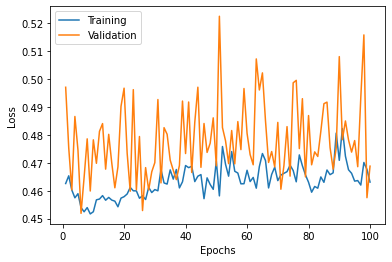

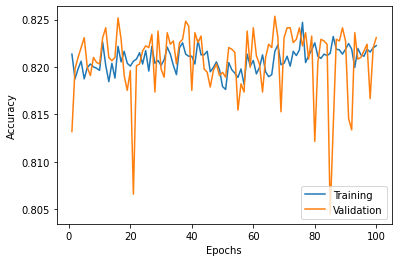

In [41]:
#plot training history

from matplotlib import pyplot as plt
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(history)

In [44]:
# quickly get the performance score
score = model.evaluate(x_train, y_train, batch_size=batch_size) #evaluating the models accuracy or loss,
print('test loss, test acc:', score)

2400/2400 [==============================] - 3s 1ms/step - loss: 0.4595 - accuracy: 0.8229
test loss, test acc: [0.459516704082489, 0.8228645920753479]


In [45]:
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("\n%s: %.2f" % (model.metrics_names[0], score[0]))


accuracy: 82.29%

loss: 0.46


# Validate the model and comment the results

I risultati del training sono confermati sul set di test.
Dalla confusion matrix è possibile vedere che i valori di recall e l'f1-score per i valori veritieri sono bassi.

In [46]:
predictions = model.predict(x_train_test)

In [48]:
predictions.shape

(4800, 1)

In [51]:
yy_train_test = (predictions > 0.5).astype(np.int8)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_train_test,yy_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3717
           1       0.68      0.34      0.46      1083

    accuracy                           0.82      4800
   macro avg       0.76      0.65      0.67      4800
weighted avg       0.80      0.82      0.79      4800



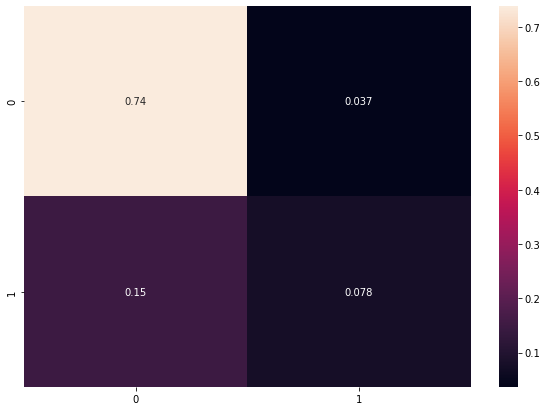

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_train_test,yy_test,normalize='all')
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

# Make predictions (on the provided test set)

I risultati sono credo verimili anche se facendo il rapporto con y_train le predizioni danno un numero inferiore di valori true.

In [80]:
predictions = model.predict(x_test)

In [82]:
yy_test = (predictions > 0.5).astype(np.int8)

In [99]:
num_zeros = (yy_test == 0).sum()
num_ones = (yy_test == 1).sum()
num_zeros,num_ones

(5160, 840)

# OPTIONAL -- Export the predictions in the format indicated in the assignment release page.

# OPTIONAL -- Implement some regularization methods of your choice and make a comparison between (training/validation) performances of regularized models (also compare with the case of no regularization)

Attempts in this section will be taken into account, if well-enough done, to (at least partially) compensate for potential incorrectessness in the mandatory sections. 
On the other hand, any incorrectessness in _this_ section won't be taken into account in the final score.